In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

with open("C:/Python/Assignments/Preprocessing/final_sorted.txt", "rb") as file:
    sorted_data = pickle.load(file)

from wordcloud import WordCloud
# https://www.geeksforgeeks.org/generating-word-cloud-python/
def cloud(cluster,i):
    wordcloud = WordCloud(collocations=False, background_color ='white', 
                    min_font_size = 10).generate(str(list(cluster)))
    plt.figure(figsize = (6,6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Cluster "+str(i),size= 30,)
    plt.show() 


C:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<ol>
    <li><strong>Apply DBSCAN Clustering on these feature sets:</strong>
        <ul>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Find the best ‘Eps’ using the <a href='https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#48558030'>elbow-knee method.</a></li>
    <li>Same as before, plot word clouds for each cluster and summarize in your own words what that cluster is representing.</li>
            <li>You can take around 5000 reviews for this as well.</li>
        </ul>
    </li>
</ol>

### [5.2.1] Applying DBSCAN on AVG W2V,<font color='red'> SET 3</font>

In [66]:
data = sorted_data[:10000]
X = data['Text_new'].values
# Please write all the code with proper documentation
# List of sentence in X_train text
sent_x = []
for sent in X :
    sent_x.append(sent.split())
  
    
# Train your own Word2Vec model using your own train text corpus 
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(sent_x,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))

# compute average word2vec for each review for sent_x .
train_vectors = []; 
for sent in tqdm(sent_x):
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: # 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
    
data_3 = StandardScaler().fit_transform(train_vectors)

number of words that occured minimum 5 times  6552


100%|███████████████████████████████████| 10000/10000 [00:33<00:00, 297.08it/s]


In [93]:
def db(data,min_point):
    '''
    Plot the nth distance for each point to determine eps value'''
    distances = []
    for xi in tqdm(data):
        tmp = np.linalg.norm(data-xi,axis=1)
        tmp = np.sort(tmp)
        distances.append(tmp[min_point])
    distances = np.sort(distances)
    plt.plot(distances)
    plt.grid(True)
    plt.ylabel("Distances")
    plt.title("nth Distances for each point to determine eps")
    plt.show()

100%|███████████████████████████████████| 10000/10000 [01:20<00:00, 123.80it/s]


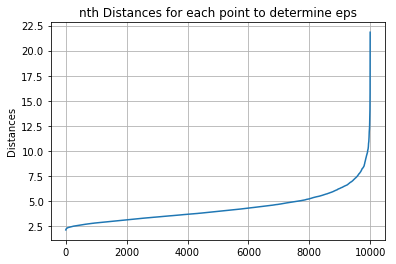

In [71]:
db(data=data_3,min_point= 2*data_3.shape[1])

Epsilon Value =  5


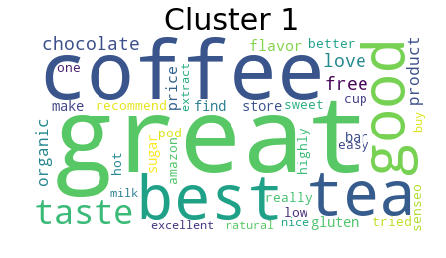

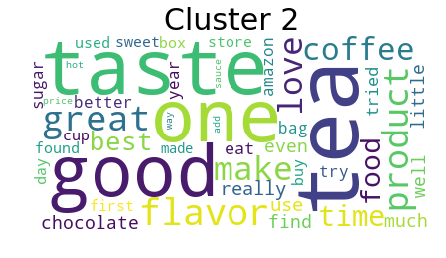

Epsilon Value =  6.5


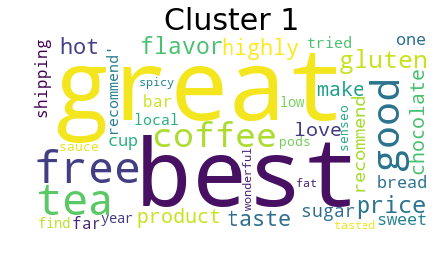

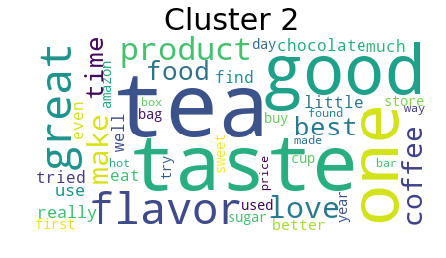

Epsilon Value =  7.5


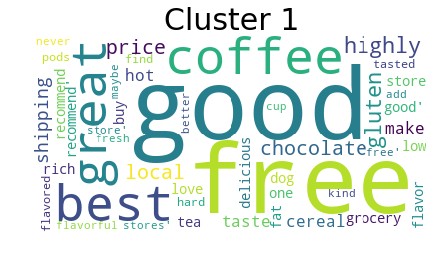

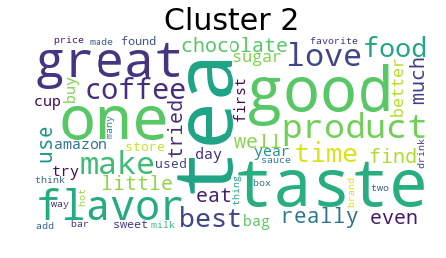

In [88]:
epsilon = [5,6.5,7.5]
for ep in epsilon:
    print("Epsilon Value = ",ep)
    db = DBSCAN(eps=ep, min_samples=2*data_3.shape[1]).fit(data_3)
    labels = db.labels_ + 1 # to avoid -1 a for outliers
    clust = [ [] for i in range(len(set(labels))) ]  # this is the list of clusters
    for i in range(labels.shape[0]):
        clust[labels[i]].append(X[i])
    i = 1
    for cl in clust:
        cloud(cl,i)
        i += 1

**Observation:**
* The first cluster is the cluster of outliers and DBSCAN made a <font color='blue'>single</font> cluster for all the other points

<font color='red'>**With eps = 5:**</font>
  
The clusters are about,
1. This cluster is about coffee, chocolate words.
2. This cluster is about tea, flavour, taste related words.


<font color='red'>**With eps = 6.5:**</font>

The clusters are about,
1. This cluster is about coffee, chocolate words.
2. This cluster is about tea, flavour, taste related words.


<font color='red'>**With eps = 7.5:**</font>

The clusters are about,
1. This cluster is about coffee, chocolate, free related words.
2. This cluster is about tea, tatse, tea bag related words.

### [5.2.3] Applying Agglomerative Clustering on TFIDF W2V,<font color='red'> SET 4</font>

In [89]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(sent_x): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
data_4 = StandardScaler().fit_transform(tfidf_sent_vectors)

100%|████████████████████████████████████| 10000/10000 [02:13<00:00, 74.82it/s]


100%|███████████████████████████████████| 10000/10000 [00:59<00:00, 168.59it/s]


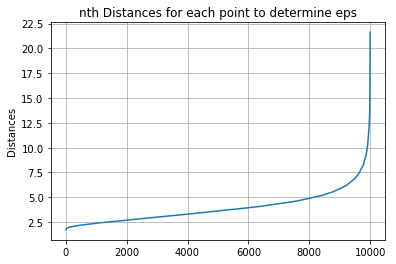

In [94]:
db(data=data_4,min_point= 2*data_4.shape[1])

Epsilon Value =  5


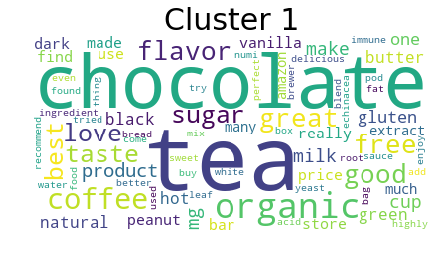

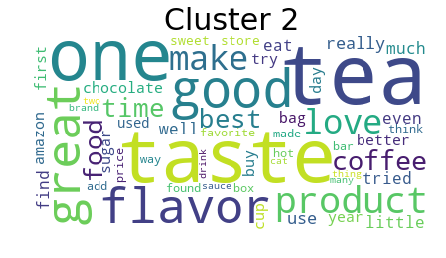

Epsilon Value =  6.5


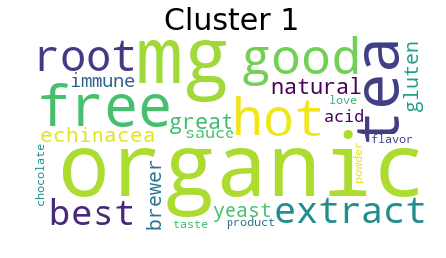

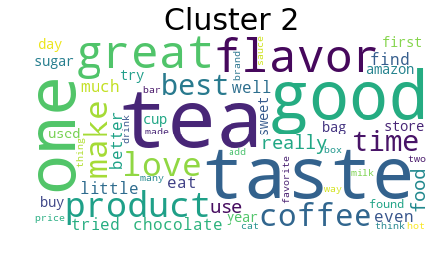

Epsilon Value =  7.5


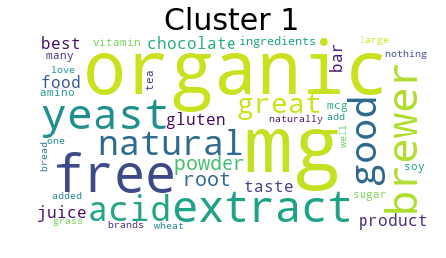

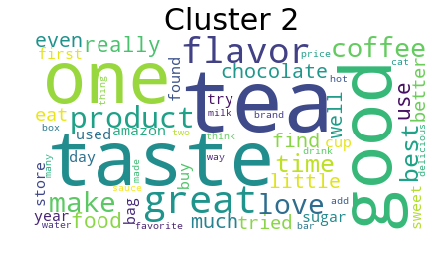

In [95]:
epsilon = [5,6.5,7.5]
for ep in epsilon:
    print("Epsilon Value = ",ep)
    db = DBSCAN(eps=ep, min_samples=2*data_3.shape[1]).fit(data_4)
    labels = db.labels_ + 1 # to avoid -1 a for outliers
    clust = [ [] for i in range(len(set(labels))) ]  # this is the list of clusters
    for i in range(labels.shape[0]):
        clust[labels[i]].append(X[i])
    i = 1
    for cl in clust:
        cloud(cl,i)
        i += 1

**Observation:**
* The first cluster is the cluster of outliers and DBSCAN made a <font color='blue'>single</font> cluster for all the other points

<font color='red'>**With eps = 5:**</font>
  
The clusters are about,
1. This cluster is about tea, chocolate words.
2. This cluster is about tea, coffee, flavour, taste related words.


<font color='red'>**With eps = 6.5:**</font>

The clusters are about,
1. This cluster is about tea, organic natural related words.
2. This cluster is about tea, flavour, taste related words.


<font color='red'>**With eps = 7.5:**</font>

The clusters are about,
1. This cluster is about tea, organic natural related words.
2. This cluster is about tea, flavour, taste related words.